In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import os
import sys
import bilby
import seaborn as sns
import pandas as pd
%matplotlib notebook
import matplotlib as mpl

In [2]:
def fit_parabola(x,a,b):
    return a*x**2 + b

def fit_offset_parabola(x,a,b,off):
    return a*(x-off)**2 + b

In [3]:
telescope='MeerKAT'
#telescope='Parkes'

if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')
    Total_chn=27
    residuals_32p_SI_Entire_data = np.genfromtxt('PostRes_32p_StokesI_NoBadObs_ChnRmd_all.txt')
    residuals_32p_SI_SysNoise_Entire_data = np.genfromtxt('PostRes_32p_StokesI_NoBadObs_ChnRmd_SysNoise.txt')

if telescope=='Parkes':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_UWL_01Aug_22/Processed/phase_shifted/timfiles')
    Total_chn=35
    residuals_32p_SI_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all.txt')
    residuals_32p_SI_SysNoise_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all_SysNoise.txt')

residuals_32p_SI_Entire_data = residuals_32p_SI_Entire_data.reshape((-1,Total_chn,4)) 

residuals_32p_SI_Entire=residuals_32p_SI_Entire_data[:,:,2]
Freq_32p_SI_Entire=np.mean(residuals_32p_SI_Entire_data[:,:,1],axis=0)

residuals_32p_SI_SysNoise_Entire_data = residuals_32p_SI_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_32p_SI_SysNoise_Entire=residuals_32p_SI_SysNoise_Entire_data[:,:,2]
Freq_32p_SI_SysNoise_Entire=np.mean(residuals_32p_SI_SysNoise_Entire_data[:,:,1],axis=0)


<IPython.core.display.Javascript object>


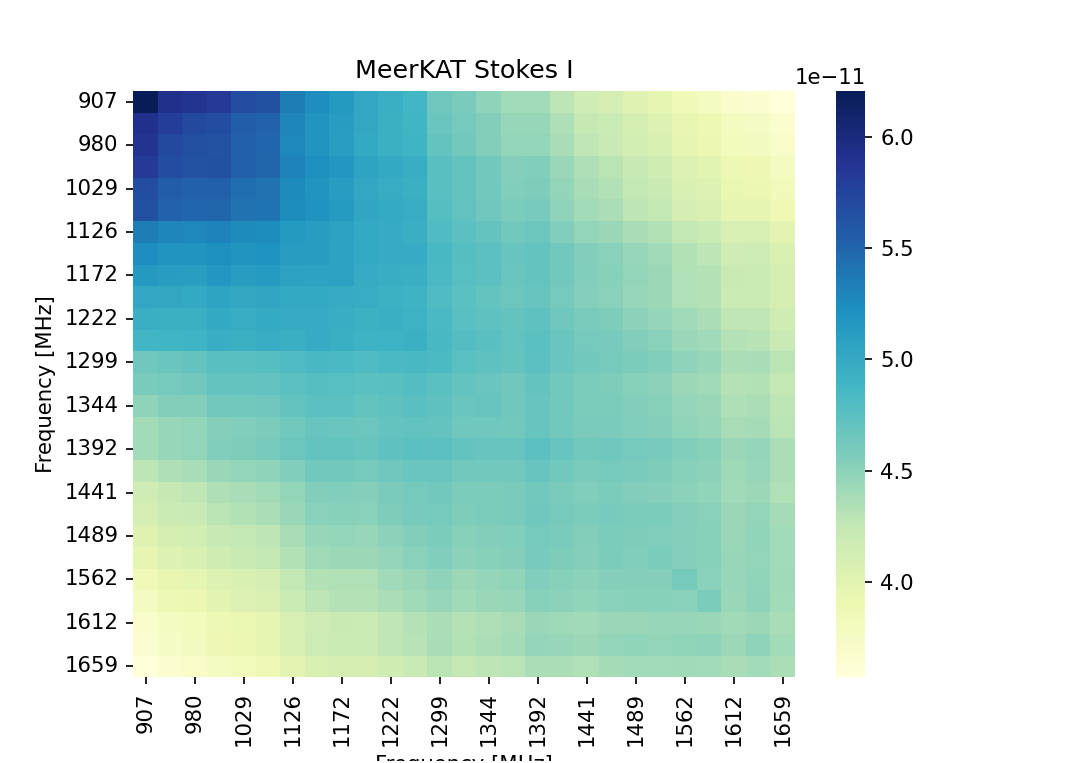

Text(0.5, 1.0, 'MeerKAT Stokes I')

In [4]:
Cov_res_32p_SI_Entire=np.cov(residuals_32p_SI_Entire,rowvar=False)
Cov_sysres_32p_SI_Entire=np.cov(residuals_32p_SI_SysNoise_Entire,rowvar=False)

Cov_jitter_32p_SI_Entire=Cov_res_32p_SI_Entire-Cov_sysres_32p_SI_Entire

df=pd.DataFrame(data=Cov_jitter_32p_SI_Entire,
               index=[int(Freq_32p_SI_Entire[i]) for i in range(Freq_32p_SI_Entire.shape[0])],
               columns=[int(Freq_32p_SI_Entire[i]) for i in range(Freq_32p_SI_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu')
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
Ax.set_title('MeerKAT Stokes I')

<IPython.core.display.Javascript object>


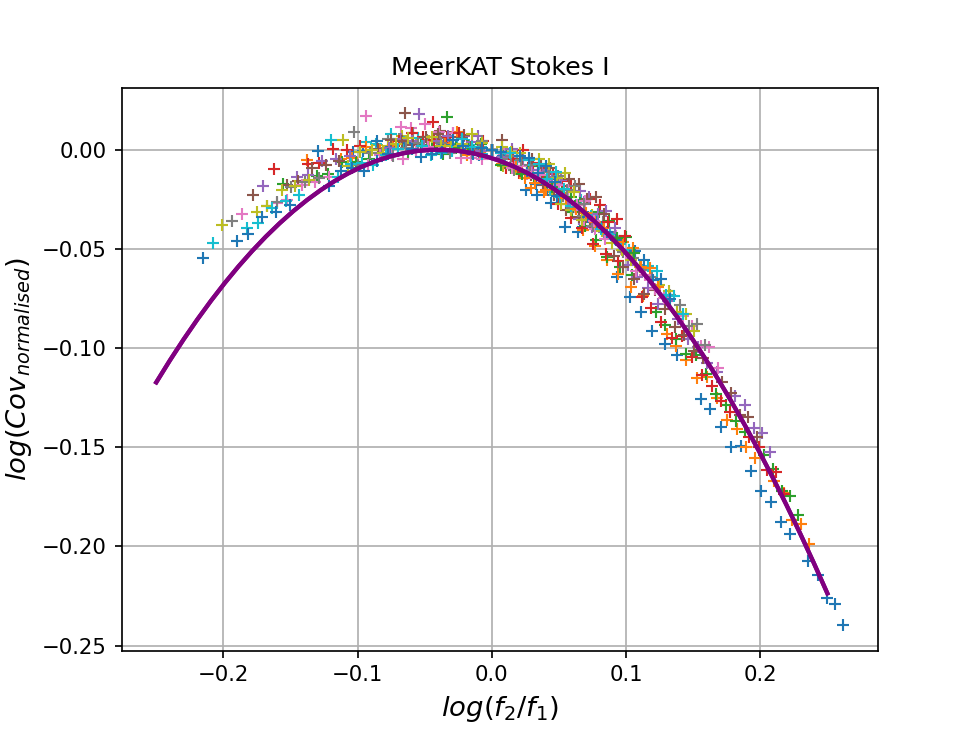

In [5]:
plt.figure()
for chn in np.arange(21):#10*sbplt,10*(sbplt+1)):#R_32p_SI_Entire_spr.shape[0]):
    if chn == 29:
        continue
    freq_axis=[]
    corr_axis=[]
    for i in range(Freq_32p_SI_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_32p_SI_Entire[i]/Freq_32p_SI_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_32p_SI_Entire[i,chn]/Cov_jitter_32p_SI_Entire[chn,chn])**1)
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
    plt.plot((freq_axis),corr_axis,'+')#,label="$f_{1}=$"+str(int(Freq_32p_SI_Entire[chn])))
    #plt.xscale('log')
    plt.title("MeerKAT Stokes I")
    plt.ylabel("$log(Cov_{normalised})$",size=13)
    plt.xlabel("$log(f_{2}/f_{1})$",size=13)
#plt.plot(np.linspace(-0.6,0.6,num=50),fit_parabola(np.linspace(-0.6,0.6,num=50),-2.03,-0.03),'purple',linewidth=2) ## Parkes
plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.grid()
#plt.legend()

#### Stokes Q

In [6]:
telescope='MeerKAT'
#telescope='Parkes'

if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')
    Total_chn=27
    residuals_32p_SQ_Entire_data = np.genfromtxt('PostRes_32p_StokesQ_NoBadObs_ChnRmd_all.txt')
    residuals_32p_SQ_SysNoise_Entire_data = np.genfromtxt('PostRes_32p_StokesQ_NoBadObs_ChnRmd_SysNoise.txt')

if telescope=='Parkes':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_UWL_01Aug_22/Processed/phase_shifted/timfiles')
    Total_chn=35
    residuals_32p_SQ_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all.txt')
    residuals_32p_SQ_SysNoise_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all_SysNoise.txt')

residuals_32p_SQ_Entire_data = residuals_32p_SQ_Entire_data.reshape((-1,Total_chn,4)) 

residuals_32p_SQ_Entire=residuals_32p_SQ_Entire_data[:,:,2]
Freq_32p_SQ_Entire=np.mean(residuals_32p_SQ_Entire_data[:,:,1],axis=0)

residuals_32p_SQ_SysNoise_Entire_data = residuals_32p_SQ_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_32p_SQ_SysNoise_Entire=residuals_32p_SQ_SysNoise_Entire_data[:,:,2]
Freq_32p_SQ_SysNoise_Entire=np.mean(residuals_32p_SQ_SysNoise_Entire_data[:,:,1],axis=0)


<IPython.core.display.Javascript object>


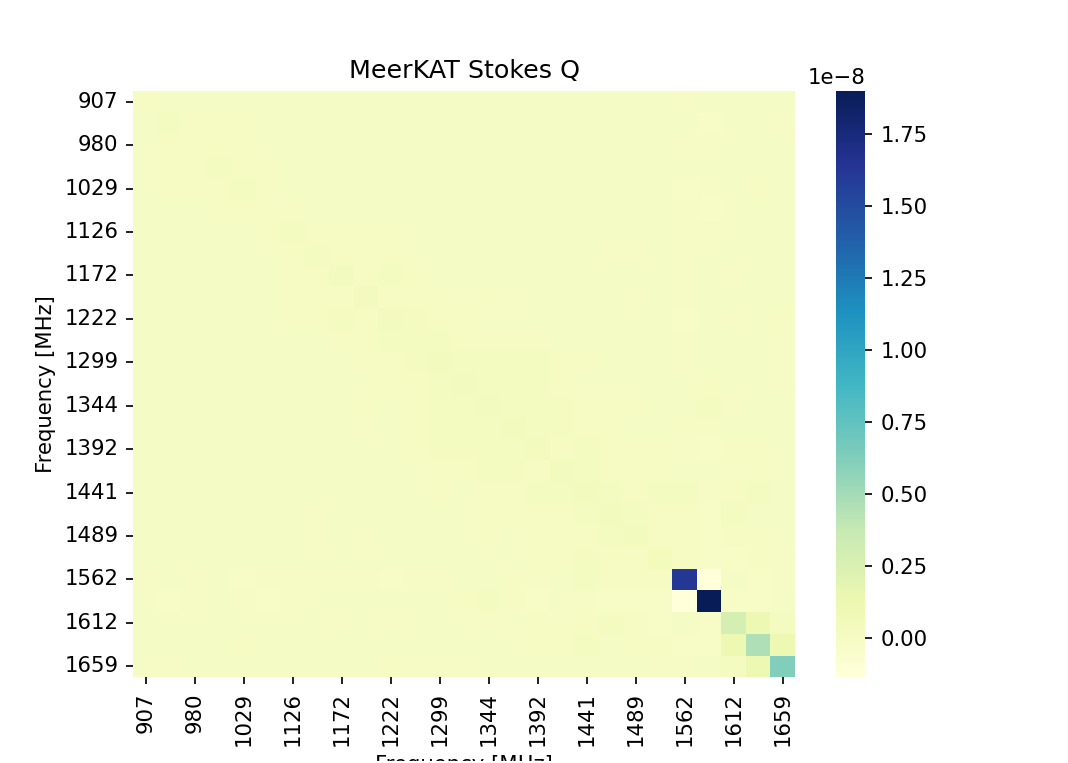

Text(0.5, 1.0, 'MeerKAT Stokes Q')

In [7]:
Cov_res_32p_SQ_Entire=np.cov(residuals_32p_SQ_Entire,rowvar=False)
Cov_sysres_32p_SQ_Entire=np.cov(residuals_32p_SQ_SysNoise_Entire,rowvar=False)

Cov_jitter_32p_SQ_Entire=Cov_res_32p_SQ_Entire-Cov_sysres_32p_SQ_Entire

df=pd.DataFrame(data=Cov_jitter_32p_SQ_Entire,
               index=[int(Freq_32p_SQ_Entire[i]) for i in range(Freq_32p_SQ_Entire.shape[0])],
               columns=[int(Freq_32p_SQ_Entire[i]) for i in range(Freq_32p_SQ_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu')
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
Ax.set_title('MeerKAT Stokes Q')

<IPython.core.display.Javascript object>


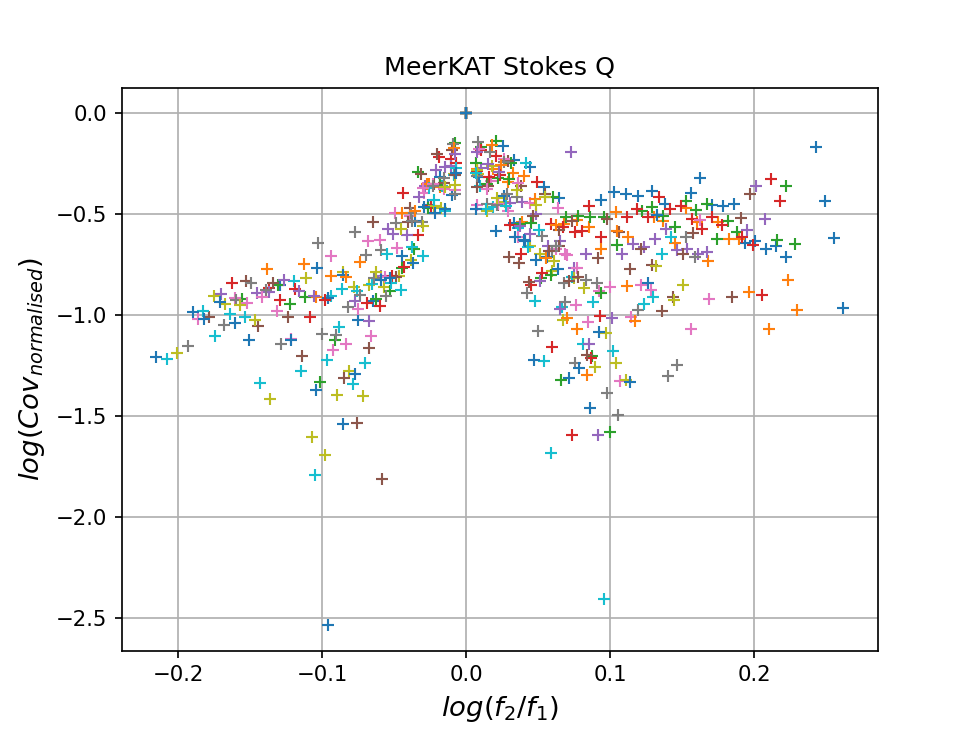

/tmp/ipykernel_9324/2337225236.py:9: RuntimeWarning: invalid value encountered in log10
  corr_axis.append(np.log10(Cov_jitter_32p_SQ_Entire[i,chn]/Cov_jitter_32p_SQ_Entire[chn,chn])**1)


In [8]:
plt.figure()
for chn in np.arange(21):#10*sbplt,10*(sbplt+1)):#R_32p_SQ_Entire_spr.shape[0]):
    if chn == 29:
        continue
    freq_axis=[]
    corr_axis=[]
    for i in range(Freq_32p_SQ_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_32p_SQ_Entire[i]/Freq_32p_SQ_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_32p_SQ_Entire[i,chn]/Cov_jitter_32p_SQ_Entire[chn,chn])**1)
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
    plt.plot((freq_axis),corr_axis,'+')#,label="$f_{1}=$"+str(int(Freq_32p_SQ_Entire[chn])))
    #plt.xscale('log')
    plt.title("MeerKAT Stokes Q")
    plt.ylabel("$log(Cov_{normalised})$",size=13)
    plt.xlabel("$log(f_{2}/f_{1})$",size=13)
#plt.plot(np.linspace(-0.6,0.6,num=50),fit_parabola(np.linspace(-0.6,0.6,num=50),-2.03,-0.03),'purple',linewidth=2) ## Parkes
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.grid()
#plt.legend()

##### Stokes U

In [9]:
telescope='MeerKAT'
#telescope='Parkes'

if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')
    Total_chn=27
    residuals_32p_SU_Entire_data = np.genfromtxt('PostRes_32p_StokesU_NoBadObs_ChnRmd_all.txt')
    residuals_32p_SU_SysNoise_Entire_data = np.genfromtxt('PostRes_32p_StokesU_NoBadObs_ChnRmd_SysNoise.txt')

if telescope=='Parkes':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_UWL_01Aug_22/Processed/phase_shifted/timfiles')
    Total_chn=35
    residuals_32p_SU_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all.txt')
    residuals_32p_SU_SysNoise_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all_SysNoise.txt')

residuals_32p_SU_Entire_data = residuals_32p_SU_Entire_data.reshape((-1,Total_chn,4)) 

residuals_32p_SU_Entire=residuals_32p_SU_Entire_data[:,:,2]
Freq_32p_SU_Entire=np.mean(residuals_32p_SU_Entire_data[:,:,1],axis=0)

residuals_32p_SU_SysNoise_Entire_data = residuals_32p_SU_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_32p_SU_SysNoise_Entire=residuals_32p_SU_SysNoise_Entire_data[:,:,2]
Freq_32p_SU_SysNoise_Entire=np.mean(residuals_32p_SU_SysNoise_Entire_data[:,:,1],axis=0)


<IPython.core.display.Javascript object>


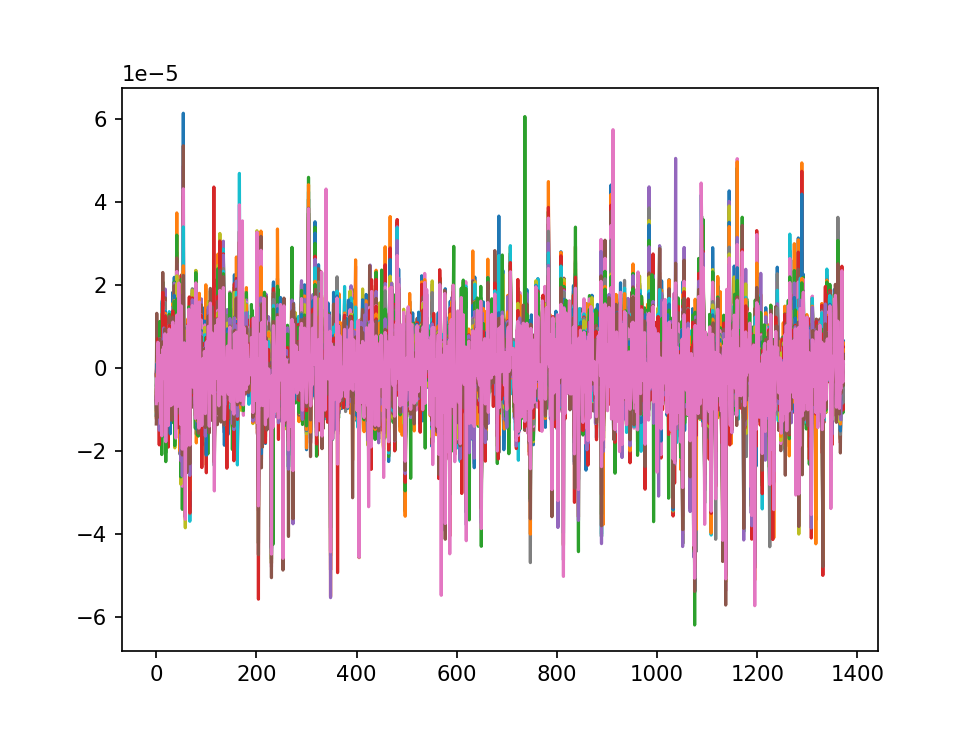

<IPython.core.display.Javascript object>


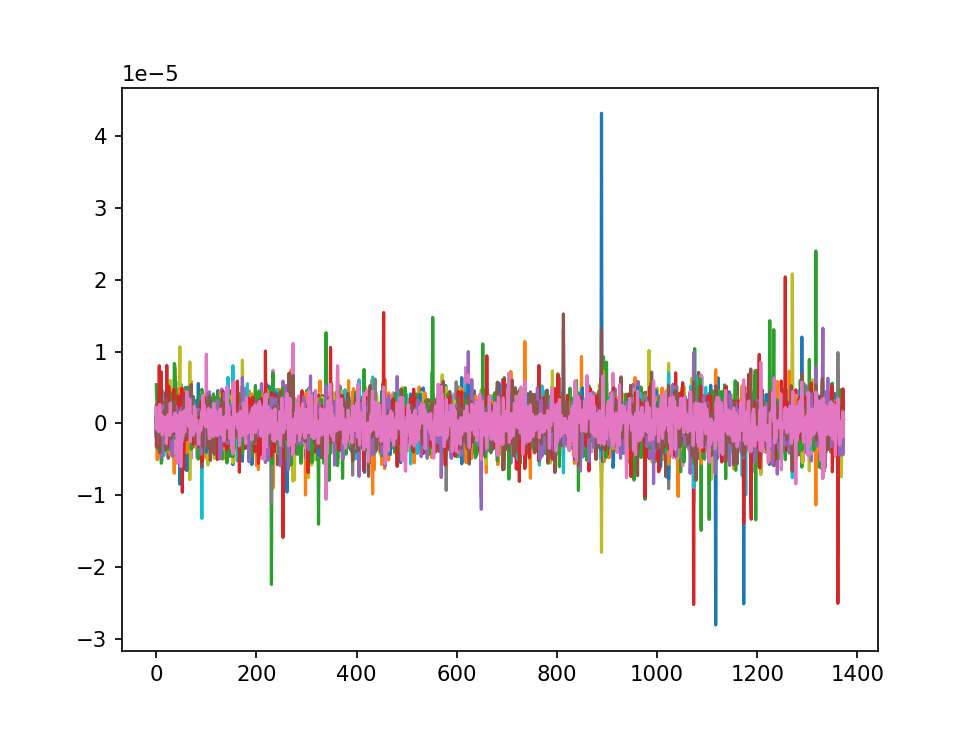

In [10]:
plt.figure()
plt.plot(residuals_32p_SU_Entire)
plt.figure()
plt.plot(residuals_32p_SU_SysNoise_Entire)

<IPython.core.display.Javascript object>


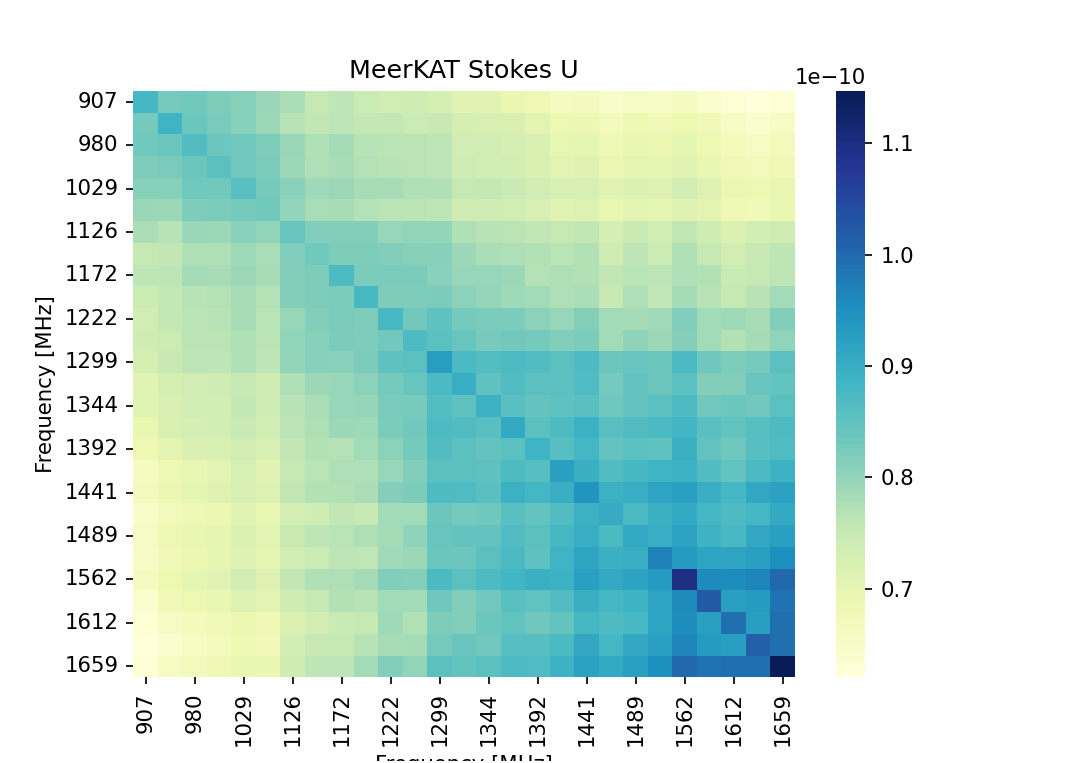

Text(0.5, 1.0, 'MeerKAT Stokes U')

In [11]:
Cov_res_32p_SU_Entire=np.cov(residuals_32p_SU_Entire,rowvar=False)
Cov_sysres_32p_SU_Entire=np.cov(residuals_32p_SU_SysNoise_Entire,rowvar=False)

Cov_jitter_32p_SU_Entire=Cov_res_32p_SU_Entire-Cov_sysres_32p_SU_Entire

df=pd.DataFrame(data=Cov_jitter_32p_SU_Entire,
               index=[int(Freq_32p_SU_Entire[i]) for i in range(Freq_32p_SU_Entire.shape[0])],
               columns=[int(Freq_32p_SU_Entire[i]) for i in range(Freq_32p_SU_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu')
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
Ax.set_title('MeerKAT Stokes U')

<IPython.core.display.Javascript object>


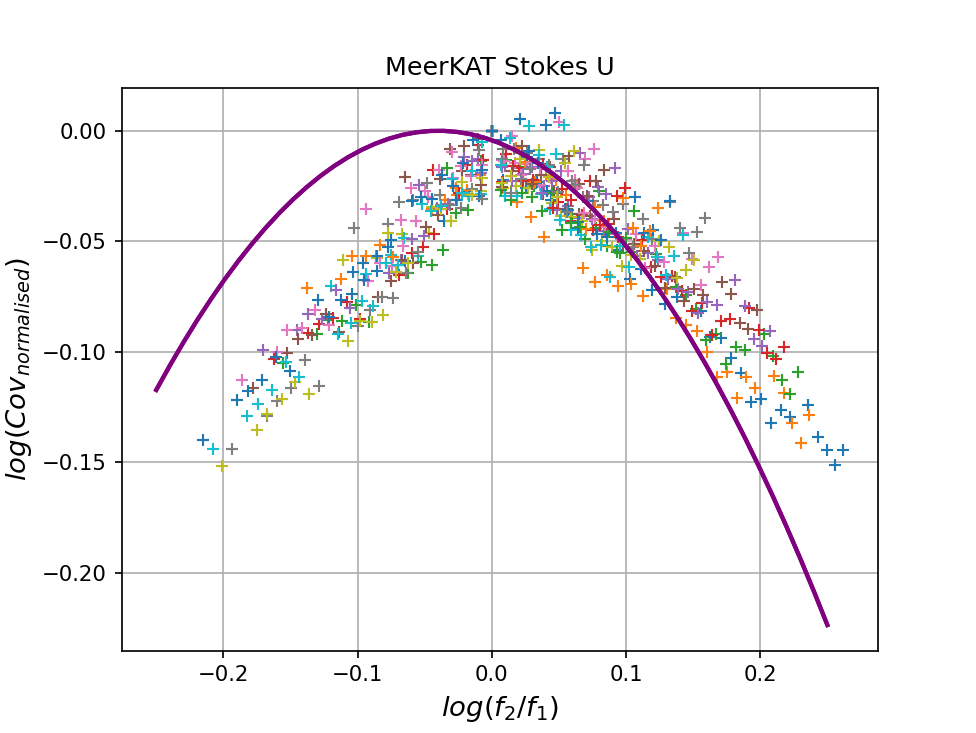

In [12]:
plt.figure()
for chn in np.arange(21):#10*sbplt,10*(sbplt+1)):#R_32p_SU_Entire_spr.shape[0]):
    if chn == 29:
        continue
    freq_axis=[]
    corr_axis=[]
    for i in range(Freq_32p_SU_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_32p_SU_Entire[i]/Freq_32p_SU_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_32p_SU_Entire[i,chn]/Cov_jitter_32p_SU_Entire[chn,chn])**1)
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
    plt.plot((freq_axis),corr_axis,'+')#,label="$f_{1}=$"+str(int(Freq_32p_SU_Entire[chn])))
    #plt.xscale('log')
    plt.title("MeerKAT Stokes U")
    plt.ylabel("$log(Cov_{normalised})$",size=13)
    plt.xlabel("$log(f_{2}/f_{1})$",size=13)
#plt.plot(np.linspace(-0.6,0.6,num=50),fit_parabola(np.linspace(-0.6,0.6,num=50),-2.03,-0.03),'purple',linewidth=2) ## Parkes
plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.grid()
#plt.legend()

##### Stokes V

In [13]:
telescope='MeerKAT'
#telescope='Parkes'

if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')
    Total_chn=27
    residuals_32p_SV_Entire_data = np.genfromtxt('PostRes_32p_StokesV_NoBadObs_ChnRmd_all.txt')
    residuals_32p_SV_SysNoise_Entire_data = np.genfromtxt('PostRes_32p_StokesV_NoBadObs_ChnRmd_SysNoise.txt')

if telescope=='Parkes':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_UWL_01Aug_22/Processed/phase_shifted/timfiles')
    Total_chn=35
    residuals_32p_SV_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all.txt')
    residuals_32p_SV_SysNoise_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all_SysNoise.txt')

residuals_32p_SV_Entire_data = residuals_32p_SV_Entire_data.reshape((-1,Total_chn,4)) 

residuals_32p_SV_Entire=residuals_32p_SV_Entire_data[:,:,2]
Freq_32p_SV_Entire=np.mean(residuals_32p_SV_Entire_data[:,:,1],axis=0)

residuals_32p_SV_SysNoise_Entire_data = residuals_32p_SV_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_32p_SV_SysNoise_Entire=residuals_32p_SV_SysNoise_Entire_data[:,:,2]
Freq_32p_SV_SysNoise_Entire=np.mean(residuals_32p_SV_SysNoise_Entire_data[:,:,1],axis=0)


In [14]:
residuals_32p_SV_Entire.shape

(1373, 27)

<IPython.core.display.Javascript object>


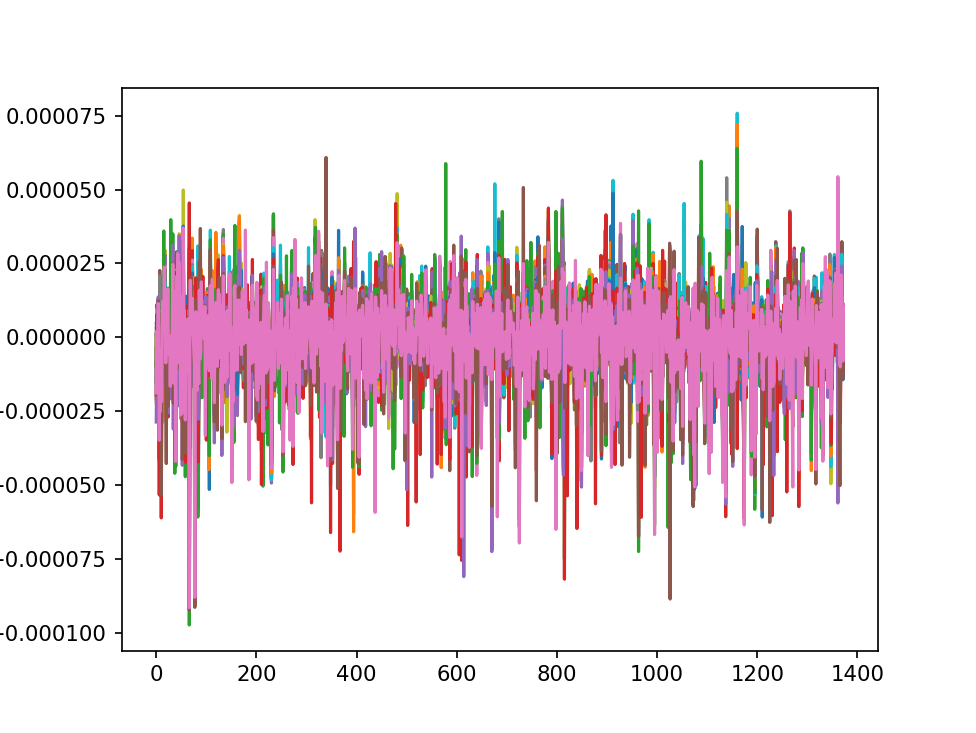

<IPython.core.display.Javascript object>


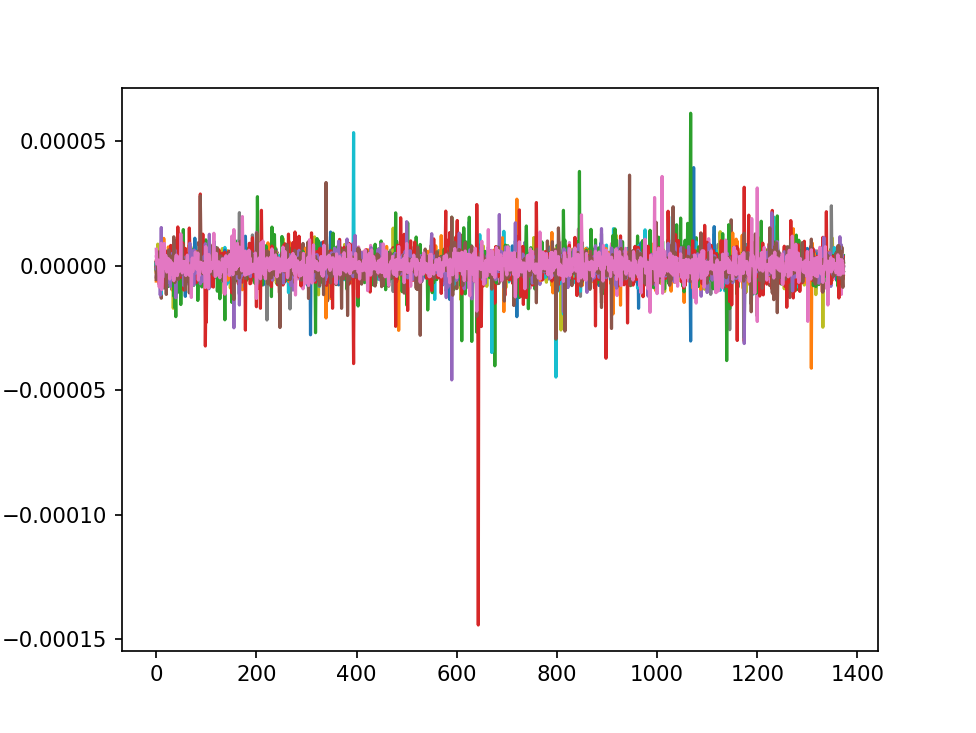

In [15]:
plt.figure()
plt.plot(residuals_32p_SV_Entire)
plt.figure()
plt.plot(residuals_32p_SV_SysNoise_Entire)

<IPython.core.display.Javascript object>


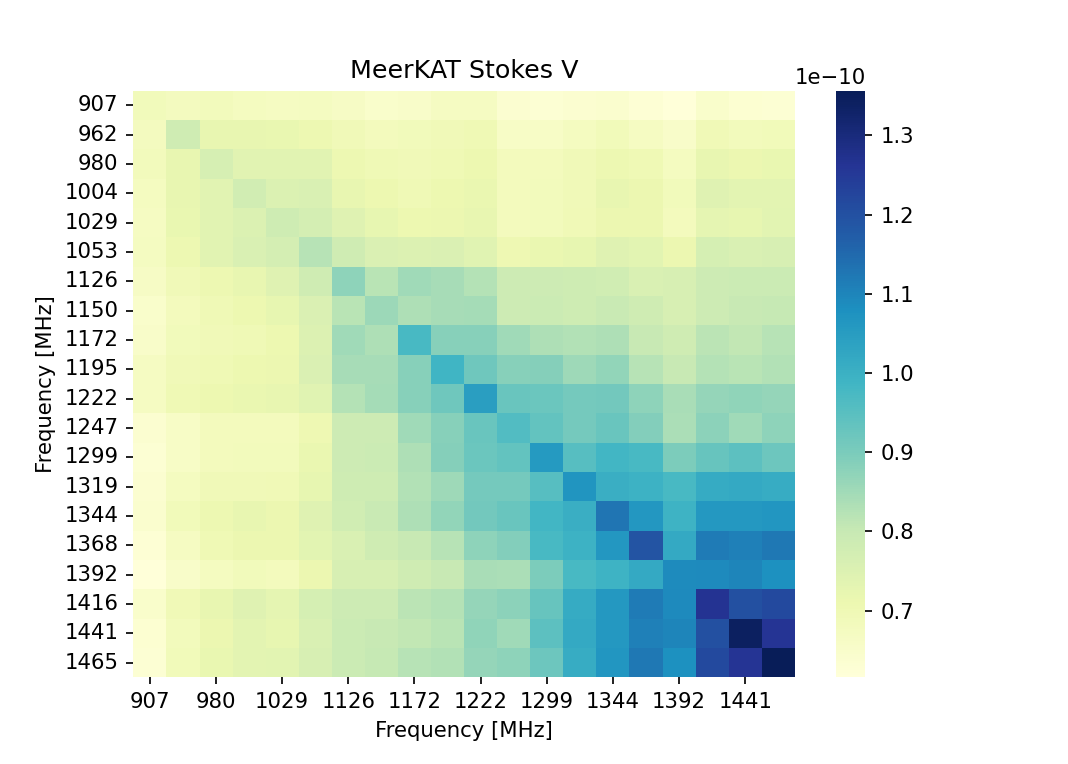

Text(0.5, 1.0, 'MeerKAT Stokes V')

In [16]:
Cov_res_32p_SV_Entire=np.cov(residuals_32p_SV_Entire,rowvar=False)
Cov_sysres_32p_SV_Entire=np.cov(residuals_32p_SV_SysNoise_Entire,rowvar=False)

Cov_jitter_32p_SV_Entire=Cov_res_32p_SV_Entire-Cov_sysres_32p_SV_Entire
#Cov_jitter_32p_SV_Entire=Cov_sysres_32p_SV_Entire

df=pd.DataFrame(data=Cov_jitter_32p_SV_Entire[0:20,0:20],
               index=[int(Freq_32p_SV_Entire[i]) for i in range(20)],#range(Freq_32p_SV_Entire.shape[0])],
               columns=[int(Freq_32p_SV_Entire[i]) for i in range(20)])#range(Freq_32p_SV_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu')
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
Ax.set_title('MeerKAT Stokes V')

<IPython.core.display.Javascript object>


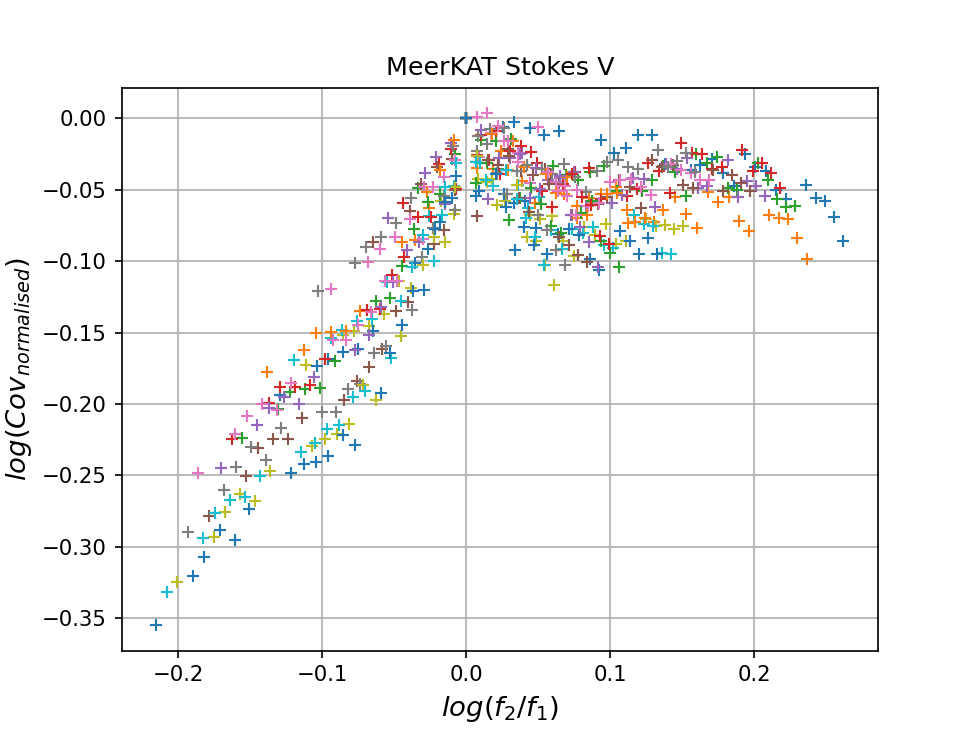

In [17]:
plt.figure()
for chn in np.arange(21):#10*sbplt,10*(sbplt+1)):#R_32p_SV_Entire_spr.shape[0]):
    if chn == 29:
        continue
    freq_axis=[]
    corr_axis=[]
    for i in range(Freq_32p_SV_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_32p_SV_Entire[i]/Freq_32p_SV_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_32p_SV_Entire[i,chn]/Cov_jitter_32p_SV_Entire[chn,chn])**1)
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
    plt.plot((freq_axis),corr_axis,'+')#,label="$f_{1}=$"+str(int(Freq_32p_SV_Entire[chn])))
    #plt.xscale('log')
    plt.title("MeerKAT Stokes V")
    plt.ylabel("$log(Cov_{normalised})$",size=13)
    plt.xlabel("$log(f_{2}/f_{1})$",size=13)
#plt.plot(np.linspace(-0.6,0.6,num=50),fit_parabola(np.linspace(-0.6,0.6,num=50),-2.03,-0.03),'purple',linewidth=2) ## Parkes
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.grid()
#plt.legend()

### Covariance arcs for invariant interval

In [18]:
telescope='MeerKAT'
#telescope='Parkes'

if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/timFiles')
    Total_chn=27
    residuals_32p_InvInt_Entire_data = np.genfromtxt('PostRes_32p_InvInt_NoBadObs_ChnRmd_all.txt')
    residuals_32p_InvInt_SysNoise_Entire_data = np.genfromtxt('PostRes_32p_InvInt_NoBadObs_ChnRmd_SysNoise.txt')

if telescope=='Parkes':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_UWL_01Aug_22/Processed/phase_shifted/timfiles')
    Total_chn=35
    residuals_32p_InvInt_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all.txt')
    residuals_32p_InvInt_SysNoise_Entire_data = np.genfromtxt('PostRes_64pulint_Entire_SelChn_all_SysNoise.txt')

residuals_32p_InvInt_Entire_data = residuals_32p_InvInt_Entire_data.reshape((-1,Total_chn,4)) 

residuals_32p_InvInt_Entire=residuals_32p_InvInt_Entire_data[:,:,2]
Freq_32p_InvInt_Entire=np.mean(residuals_32p_InvInt_Entire_data[:,:,1],axis=0)

residuals_32p_InvInt_SysNoise_Entire_data = residuals_32p_InvInt_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_32p_InvInt_SysNoise_Entire=residuals_32p_InvInt_SysNoise_Entire_data[:,:,2]
Freq_32p_InvInt_SysNoise_Entire=np.mean(residuals_32p_InvInt_SysNoise_Entire_data[:,:,1],axis=0)


In [19]:
residuals_32p_InvInt_Entire.shape

(1373, 27)

<IPython.core.display.Javascript object>


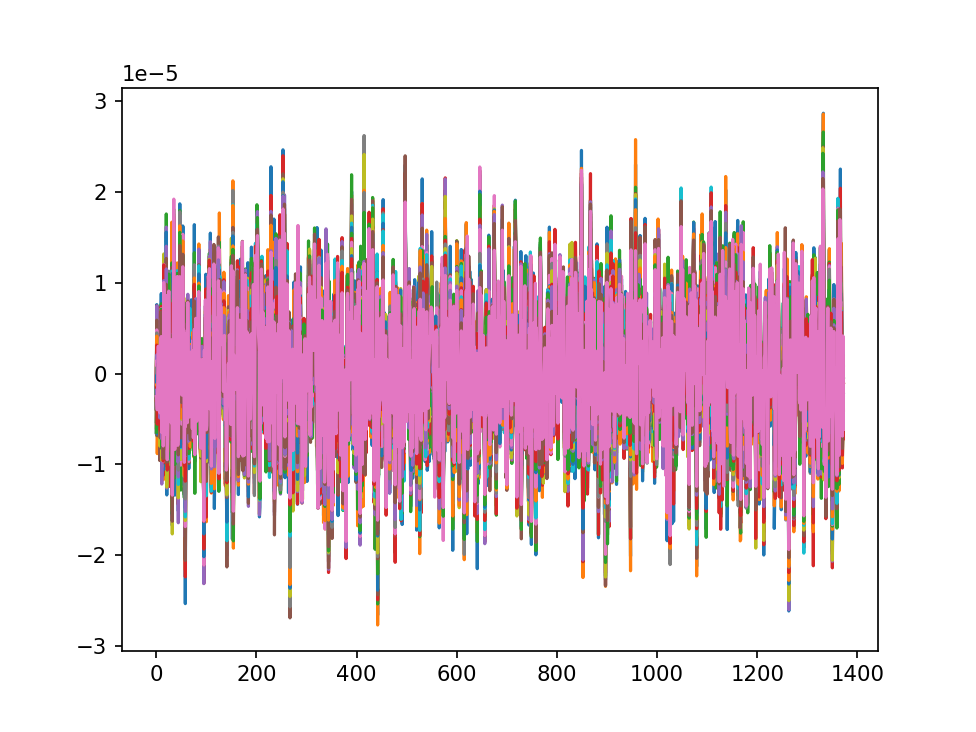

<IPython.core.display.Javascript object>


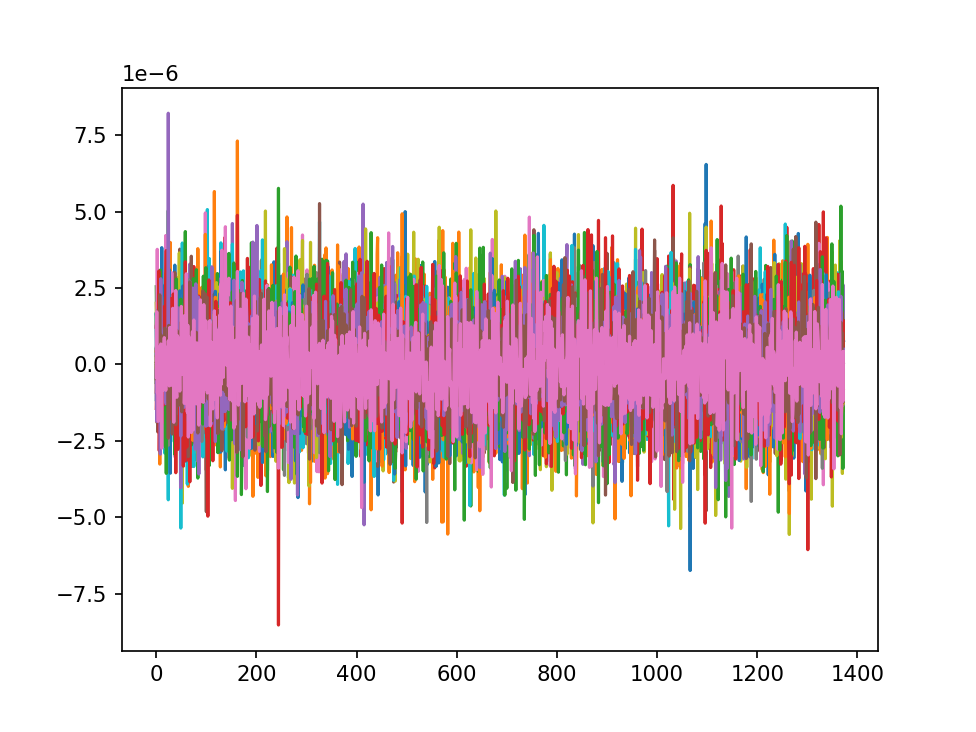

In [20]:
plt.figure()
plt.plot(residuals_32p_InvInt_Entire)
plt.figure()
plt.plot(residuals_32p_InvInt_SysNoise_Entire)

<IPython.core.display.Javascript object>


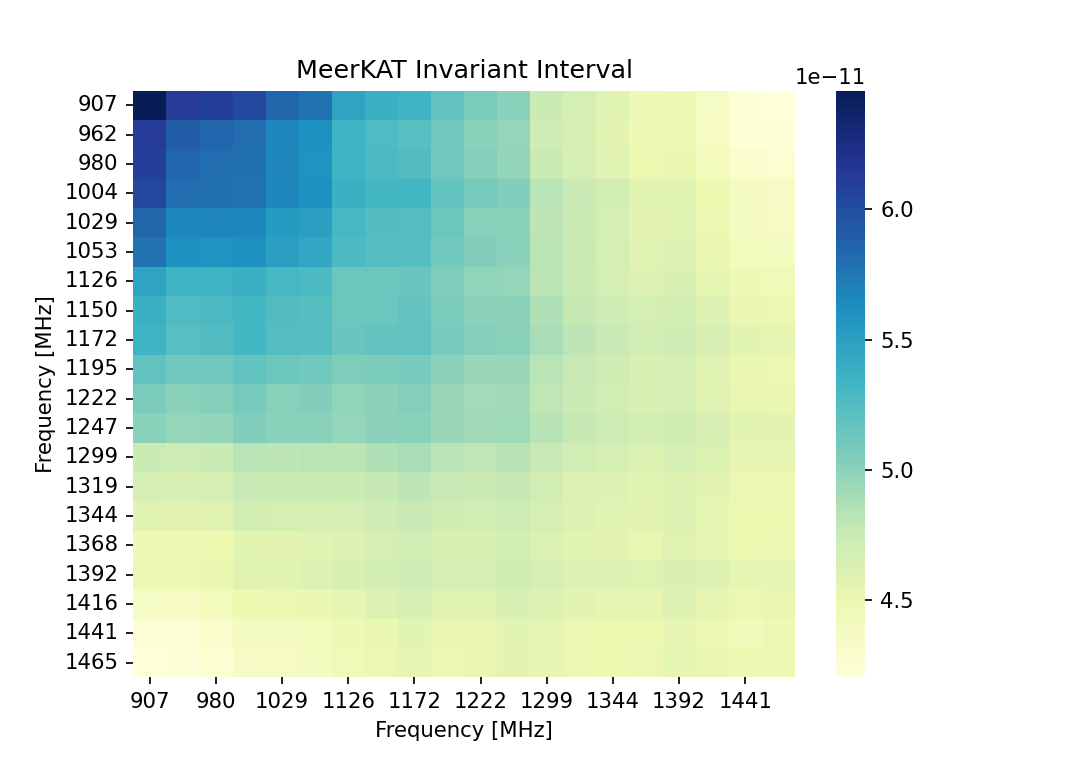

Text(0.5, 1.0, 'MeerKAT Invariant Interval')

In [21]:
Cov_res_32p_InvInt_Entire=np.cov(residuals_32p_InvInt_Entire,rowvar=False)
Cov_sysres_32p_InvInt_Entire=np.cov(residuals_32p_InvInt_SysNoise_Entire,rowvar=False)

Cov_jitter_32p_InvInt_Entire=Cov_res_32p_InvInt_Entire-Cov_sysres_32p_InvInt_Entire
#Cov_jitter_32p_InvInt_Entire=Cov_sysres_32p_InvInt_Entire

df=pd.DataFrame(data=Cov_jitter_32p_InvInt_Entire[0:20,0:20],
               index=[int(Freq_32p_InvInt_Entire[i]) for i in range(20)],#range(Freq_32p_InvInt_Entire.shape[0])],
               columns=[int(Freq_32p_InvInt_Entire[i]) for i in range(20)])#range(Freq_32p_InvInt_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu')
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
Ax.set_title('MeerKAT Invariant Interval')

<IPython.core.display.Javascript object>


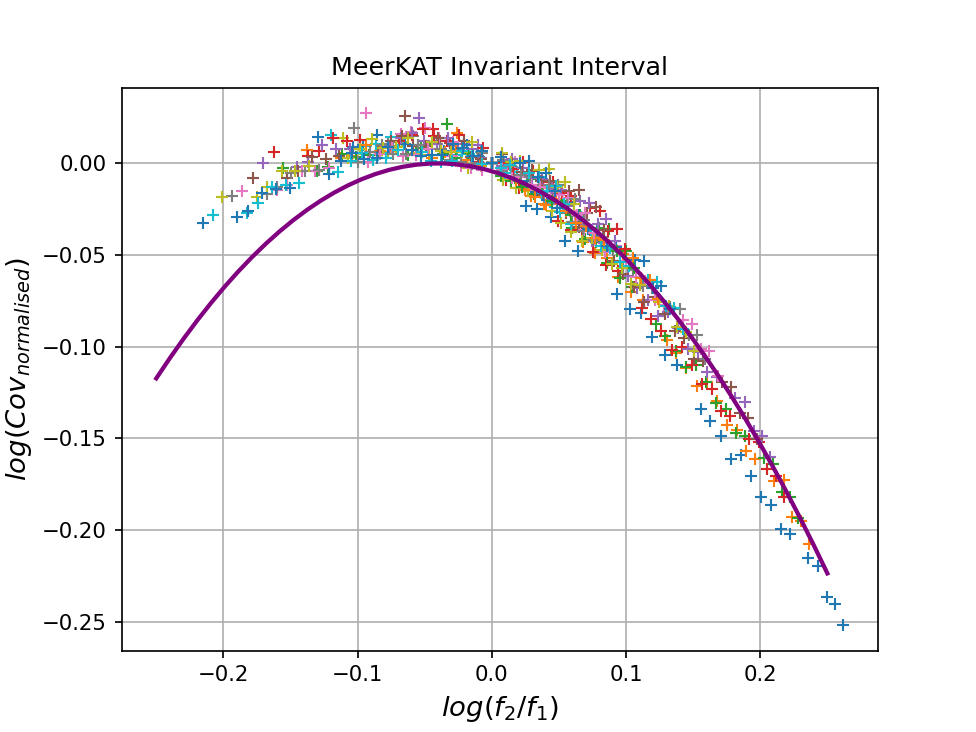

In [25]:
plt.figure()
for chn in np.arange(21):#10*sbplt,10*(sbplt+1)):#R_32p_InvInt_Entire_spr.shape[0]):
    if chn == 29:
        continue
    freq_axis=[]
    corr_axis=[]
    for i in range(Freq_32p_InvInt_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_32p_InvInt_Entire[i]/Freq_32p_InvInt_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_32p_InvInt_Entire[i,chn]/Cov_jitter_32p_InvInt_Entire[chn,chn])**1)
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
    plt.plot((freq_axis),corr_axis,'+')#,label="$f_{1}=$"+str(int(Freq_32p_InvInt_Entire[chn])))
    #plt.xscale('log')
    plt.title("MeerKAT Invariant Interval")
    plt.ylabel("$log(Cov_{normalised})$",size=13)
    plt.xlabel("$log(f_{2}/f_{1})$",size=13)
#plt.plot(np.linspace(-0.6,0.6,num=50),fit_parabola(np.linspace(-0.6,0.6,num=50),-2.03,-0.03),'purple',linewidth=2) ## Parkes
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.grid()
#plt.legend()

<IPython.core.display.Javascript object>


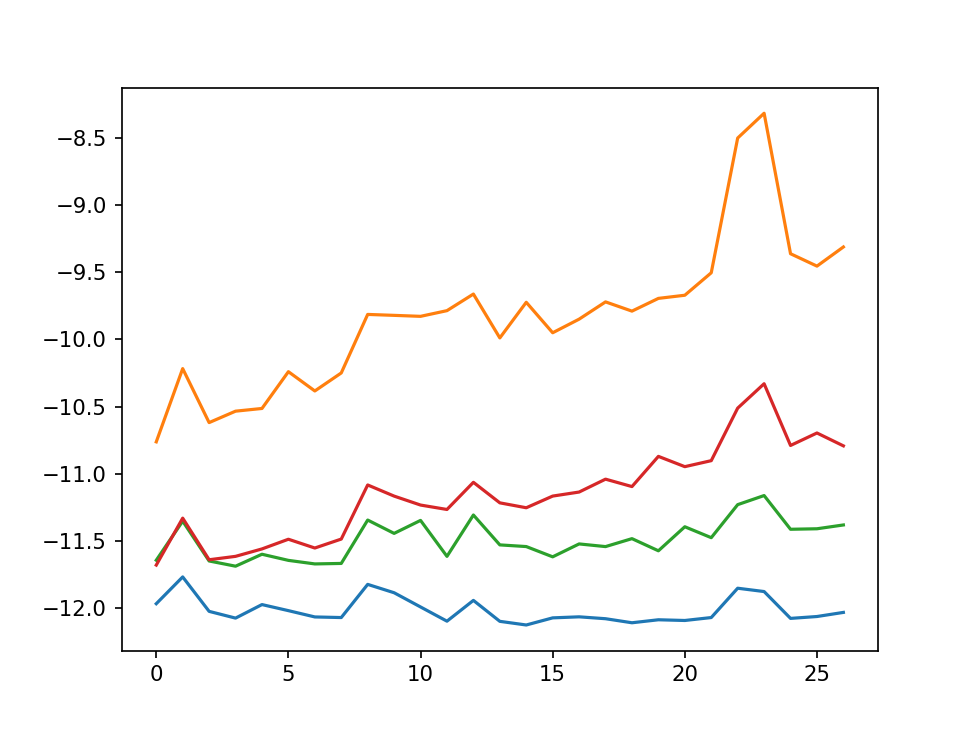

In [23]:
plt.figure()
plt.plot(np.log10([Cov_sysres_32p_SI_Entire[chn,chn] for chn in range(Cov_sysres_32p_SI_Entire.shape[0])]))
plt.plot(np.log10([Cov_sysres_32p_SQ_Entire[chn,chn] for chn in range(Cov_sysres_32p_SQ_Entire.shape[0])]))
plt.plot(np.log10([Cov_sysres_32p_SU_Entire[chn,chn] for chn in range(Cov_sysres_32p_SU_Entire.shape[0])]))
plt.plot(np.log10([Cov_sysres_32p_SV_Entire[chn,chn] for chn in range(Cov_sysres_32p_SV_Entire.shape[0])]))

<IPython.core.display.Javascript object>


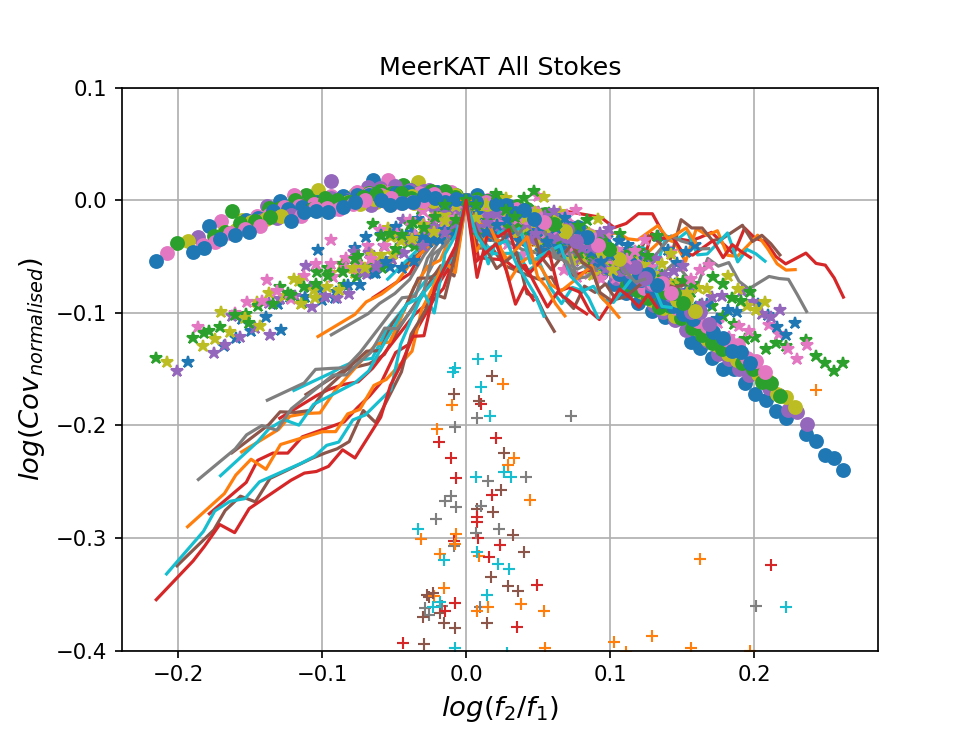

/tmp/ipykernel_9324/1022944322.py:12: RuntimeWarning: invalid value encountered in log10
  corr_axis_Q.append(np.log10(Cov_jitter_32p_SQ_Entire[i,chn]/Cov_jitter_32p_SQ_Entire[chn,chn])**1)


In [24]:
plt.figure()
for chn in np.arange(21):#10*sbplt,10*(sbplt+1)):#R_32p_SV_Entire_spr.shape[0]):
    if chn == 29:
        continue
    freq_axis_I,freq_axis_Q,freq_axis_U,freq_axis_V=[],[],[],[]
    corr_axis_I,corr_axis_Q,corr_axis_U,corr_axis_V=[],[],[],[]
    for i in range(Freq_32p_SV_Entire.shape[0]):
        freq_axis_I.append((np.log10(Freq_32p_SI_Entire[i]/Freq_32p_SI_Entire[chn])**1))
        corr_axis_I.append(np.log10(Cov_jitter_32p_SI_Entire[i,chn]/Cov_jitter_32p_SI_Entire[chn,chn])**1)
        
        freq_axis_Q.append((np.log10(Freq_32p_SQ_Entire[i]/Freq_32p_SQ_Entire[chn])**1))
        corr_axis_Q.append(np.log10(Cov_jitter_32p_SQ_Entire[i,chn]/Cov_jitter_32p_SQ_Entire[chn,chn])**1)
        
        freq_axis_U.append((np.log10(Freq_32p_SU_Entire[i]/Freq_32p_SU_Entire[chn])**1))
        corr_axis_U.append(np.log10(Cov_jitter_32p_SU_Entire[i,chn]/Cov_jitter_32p_SU_Entire[chn,chn])**1)
        
        freq_axis_V.append((np.log10(Freq_32p_SV_Entire[i]/Freq_32p_SV_Entire[chn])**1))
        corr_axis_V.append(np.log10(Cov_jitter_32p_SV_Entire[i,chn]/Cov_jitter_32p_SV_Entire[chn,chn])**1)
    #plt.xlim(-1000,1000)
    plt.ylim(-0.4,0.1)
    plt.plot(freq_axis_I,corr_axis_I,'o')#,label="$f_{1}=$"+str(int(Freq_32p_SV_Entire[chn])))
    plt.plot(freq_axis_Q,corr_axis_Q,'+')
    plt.plot(freq_axis_U,corr_axis_U,'*')
    plt.plot(freq_axis_V,corr_axis_V,'-')
    #plt.xscale('log')
    plt.title("MeerKAT All Stokes")
    plt.ylabel("$log(Cov_{normalised})$",size=13)
    plt.xlabel("$log(f_{2}/f_{1})$",size=13)
#plt.plot(np.linspace(-0.6,0.6,num=50),fit_parabola(np.linspace(-0.6,0.6,num=50),-2.03,-0.03),'purple',linewidth=2) ## Parkes
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
#plt.plot(np.linspace(-0.25,0.25,num=50),fit_parabola(np.linspace(-0.25,0.25,num=50)+0.04,-2.66,-0.00),'purple',linewidth=2)  ##MeerKAT
plt.grid()
#plt.legend()